In [30]:
import requests
import tensorflow as tf
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from skimage.transform import resize 
from google_drive_downloader import GoogleDriveDownloader as gdd


In [3]:
#Execute this code if you want download the model and upload to your google drive and execute the next cells
gdd.download_file_from_google_drive(file_id = '14F8wIUg1iD5kl9sxB-EbbwnmCQJ4suFH',
                                    dest_path = './model2.h5',
                                    unzip = False)

In [5]:
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
!ls

drive  model2.h5  sample_data


In [7]:
model = load_model("/content/drive/MyDrive/model2.h5") # load the model

In [50]:
from google.colab import files
uploaded = files.upload()

Saving 000114 (2).png to 000114 (2).png


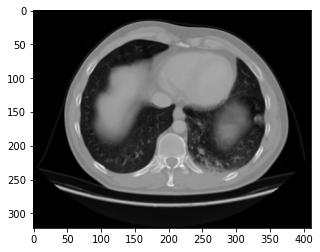

In [52]:
new_image = cv2.imread('000114 (2).png')
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
img = plt.imshow(new_image)

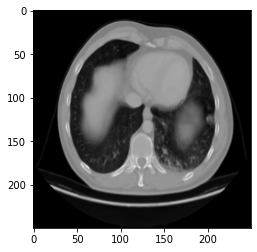

In [53]:
from skimage.transform import resize 
resized_image = resize(new_image,(250,250,3))
img = plt.imshow(resized_image)

In [54]:
predictions  = model.predict(np.array([resized_image]))
labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [55]:
#classificar as previsões do menor para o maior
#classify the predictions smaller to bigger (booblesort)
list_index = [0,1,2,3]
x = predictions

#Vamos agora ordenar do maior para o menor com um booble sort:
for i in range (4):
  for j in range (4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#mostrando ordenado:
print(list_index)

[3, 0, 1, 2]


In [56]:
for i in range (4):
  print(labels[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%')

squamous.cell.carcinoma : 86.13 %
adenocarcinoma : 13.79 %
large.cell.carcinoma : 0.08 %
normal : 0.0 %
